### Materiały do zajęć laboratoryjnych nr 11

# Python – użyteczne biblioteki (pakiety, czyli zbiory modułów)

Jak zauważyliśmy podczas ostatniego ćwiczenia, choć język Python dysponuje poleceniami wbudowanymi, jak np. `print`, to funkcje wykonujące nieco bardziej zaawansowane operacje są zawarte w zewnętrznych **modułach**. Tak jest np. w wypadku podstawowych funkcji i stałych matematycznych, które zostały zawarte w module `math`. 
Aby z nich skorzystać, należy taki moduł zaimportować do naszego skryptu. Przy każdym użyciu funkcji lub stałej z tego modułu należy również poinformować interpreter, gdzie ma jej szukać, stosując zapis w formacie `moduł.składowa`:  

In [1]:
import math
print(math.sin(math.pi/4))

0.7071067811865475


Mówimy, że `sin` i `pi` są zdefiniowane w **przestrzeni nazw** modułu `math`. Jeżeli nazwa modułu jest długa, często podczas importu tworzy się jej krótszy alias, na przykład:

```python
   import długa_nazwa_modułu as m
   m.funkcja()
```

Alternatywnie, jeżeli stawiamy na prostotę zapisu a nasz skrypt nie jest zbyt rozbudowany, możemy importować potrzebne składowe bezpośrednio do bieżącej przestrzeni nazw skryptu:

In [2]:
from math import pi, sin
print(sin(pi/4))
print("Bieżąca przestrzeń nazw", dir())

0.7071067811865475
Bieżąca przestrzeń nazw ['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'math', 'pi', 'quit', 'sin']


Jak widać, nazwy `sin` i `pi` pojawiły się w bieżącej przestrzeni nazw. Jeśli zamierzamy korzystać z wielu funkcji i stałych zdefiniowanych w module, możemy "profilaktycznie" importować _wszystkie_ jego składowe:

```python3
   from math import *
```

Import składowych modułu bezpośrednio do bieżącej przestrzeni nazw jest wygodny, ale w bardziej rozbudowanych skryptach może być niebezpieczny. Jeśli taka sama nazwa została zdefiniowana w kilku importowanych w ten sposób modułach, to import każdego kolejnego z nich spowoduje nadpisanie poprzednich definicji. Podobnie stanie się, jeśli w naszym skrypcie zdefiniujemy własną funkcję, której nazwa "przykryje" nazwę importowaną z jakiegoś modułu. **Podobne problemy, zwane konfliktem nazw, mogą występować w innych językach programowania, jak C++ czy Java.**

Po zainstalowaniu języka Python w systemie komputerowym mamy "od ręki" dostępne moduły tzw. **biblioteki standardowej**. Ich listę można znaleźć w [dokumentacji pythona](https://docs.python.org/3/py-modindex.html). 

Moduły są często zorganizowane w zbiory zwane **pakietami**. Znanym nam już pakietem jest biblioteka numeryczna **numpy**, pozwalająca m.in. na wydajne operacje na wektorach i macierzach. Inne pakiety, które mogą okazać się przydatne na studiach (choć niekoniecznie na pierwszym semestrze) to:

* **pandas** – elementarna analiza danych; biblioteka lubiana przede wszystkim ze względu na możliwość wczytania danych z pliku tekstowego lub arkusza kalkulacyjnego do struktury, do której kolumn można następnie odwoływać się przez nazwę,
* **scipy** – obliczenia statystyczne, całkowanie numeryczne, przetwarzanie sygnałów itp. 
* **scikit-learn** – podstawowe algorytmy uczenia maszynowego,
* **pytorch** – sztuczne sieci neuronowe.

Dodatkowe pakiety, tworzone głównie przez społeczność _Open Source_, udostępniane są poprzez tzw. [**Python Package Index**](https://pypi.org/). 

Do instalacji, usuwania i aktualizacji pakietów spoza biblioteki standardowej zaleca się używać dedykowanego narzędzia (tzw. _package installer_) noszącego nazwę [**pip**](https://pip.pypa.io/en/stable/reference/). Na systemach linuksowych jest ono zainstalowane automatycznie. W przypadku korzystania z IDE zainstalowanego w systemie MS Windows konieczne jest niezależne doinstalowanie narzędzia `pip`. Od tego momentu można instalować samodzielnie pakiety Pythona, np.

```sh
   pip install pandas
```

W systemie UNIX, nawet jeśli nie mamy uprawnień do zainstalowania pakietu na poziomie całego systemu, zostanie on zainstalowany lokalnie na naszym koncie. 

Program `pip` pozwala także zorientować się, jakie pakiety Pythona są dostępne na naszej maszynie:

In [3]:
!pip list # Początkowy wykrzyknik wymusza na notatniku Jupytera wykonanie polecenia powłoki. 
          # Wydając to polecenie w terminalu, należy go pominąć.

Package                       Version
----------------------------- ------------------------------------
alabaster                     1.0.0
anyio                         3.5.0
appdirs                       1.4.4
apptools                      5.1.0
apt-clone                     0.2.1
apturl                        0.5.2
argon2-cffi                   21.1.0
arrow                         1.3.0
async-lru                     2.0.4
async-timeout                 4.0.1
attrs                         24.2.0
autobahn                      21.11.1
Automat                       20.2.0
babel                         2.16.0
backcall                      0.2.0
base58                        1.0.3
bcrypt                        3.2.0
beautifulsoup4                4.10.0
beniget                       0.4.1
black                         21.10b0
bleach                        6.1.0
blinker                       1.4
Brlapi                        0.8.3
Brotli                        1.0.9
cbor                    

Poniżej zostaną krótko zaprezentowane dwa wybrane pakiety, które są zazwyczaj dostępne bez konieczności ich instalacji.

## Python Imaging Library (PIL) – obecnie rozwijana pod nazwą Pillow


Jest to biblioteka dedykowana obsłudze plików graficznych bitmapowych ([dokumentacja pakietu](https://pillow.readthedocs.io/en/latest/index.html)). Umożliwia ona między innymi:

* odczyt i zapis plików graficznych,
* tworzenie "miniaturek",
* operacje wycinania i wklejania fragmentów bitmap,
* transformacje geometryczne,
* nakładanie filtrów,
* tworzenie animacji składających się z sekwencji bitmap,
* tworzenie dokumentów w formacie PostScript.

Poniższy skrypt wczytuje zadany plik graficzny, a następnie wyświetla jego podstawowe parametry:

In [4]:
from PIL import Image
firstImage = Image.open('./python_part_2_pics/example.jpg')
print(firstImage.size, firstImage.format, firstImage.mode)

(2000, 1333) JPEG RGB


Poniżej zawartość analizowanego zdjęcia: 

![](./python_part_2_pics/example.jpg)

Można je także otworzyć w zewnętrznej przeglądarce zdjęć, odkomentowując poniższe polecenie, a następnie wykonując zawierającą je komórkę notatnika (`Shift + Enter`):

In [5]:
#firstImage.show()

Tworzenie "miniaturki" zdjęcia i jej zapis do nowego pliku realizowane jest przez poniższy kod:

In [6]:
firstImage.thumbnail((128, 128)) # Zagadka: jakiego typu argument przyjmuje ta funkcja?
firstImage.save("./python_part_2_pics/exampleThumnail.jpg")

I jej podgląd:
![](./python_part_2_pics/exampleThumnail.jpg)

Podstawowe operacje przekształcające realizuje kolejny skrypt:

In [7]:
bitMap1 = firstImage.rotate(45)
bitMap2 = firstImage.transpose(Image.FLIP_LEFT_RIGHT)
bitMap3 = firstImage.transpose(Image.FLIP_TOP_BOTTOM)
bitMap4 = firstImage.transpose(Image.ROTATE_270)
bitMap1.save('./python_part_2_pics/1.jpg')
bitMap2.save('./python_part_2_pics/2.jpg')
bitMap3.save('./python_part_2_pics/3.jpg')
bitMap4.save('./python_part_2_pics/4.jpg')

i wynik jego działania:

|      |      |
| ---- | ---- |
| 1.jpg ![](./python_part_2_pics/1.jpg)     | 2.jpg ![](./python_part_2_pics/2.jpg)      |
| 3.jpg ![](./python_part_2_pics/3.jpg)     | 4.jpg ![](./python_part_2_pics/4.jpg)      |

Przekształcenia przestrzeni kolorów można dokonać, wykorzystując metodę `convert(arg)`:

Wartość argumentu `arg`:

* `"1"` – obraz czarno biały, 1 bit na piksel.
* `"L"` – obraz w odcieniach szarości, 8-bitowy bajt na piksel.
* `"RGB"` – obraz zapisany w formacie trójek: red-green-blue, 3 bajty na piksel.
* `"RGBA"` – obraz zapisany jak w RGB z dodatkowym tzw. kanałem alfa opisującym przezroczystość, 4 bajty na piksel.
* `"CMYK"` – obraz zapisany w formacie czwórek: cyan-magenta-yellow-black, 4 bajty na piksel (przestrzeń kolorów stosowana w przypadku drukowania bitmapy).

Funkcjonalność tę przedstawia poniższy skrypt:

In [8]:
convert1=firstImage.convert("1")
convert2=firstImage.convert("L")
convert1.save("./python_part_2_pics/convert1.jpg")
convert2.save("./python_part_2_pics/convert2.jpg")

Wynik działania: 

|   convert1.jpg    | convert2.jpg     |
| ---- | ---- |
| ![](./python_part_2_pics/convert1.jpg)     |  ![](./python_part_2_pics/convert2.jpg)      |

Pakiet `PIL` dostarcza także predefiniowany zbiór **filtrów**. Filtrowanie w przetwarzaniu obrazów oznacza, że do obliczenia nowej wartości koloru piksela brane są pod uwagę wartości pikseli z jego otoczenia. Dostępne filtry to:

* BLUR,
* CONTOUR,
* DETAIL,
* EDGE_ENHANCE,
* EDGE_ENHANCE_MORE,
* EMBOSS,
* FIND_EDGES,
* SHARPEN,
* SMOOTH,
* SMOOTH_MORE.

Filtrowanie odbywa się przy użyciu metody `filter()`. Funkcjonalność tę obrazuje poniższy skrypt:

In [9]:
from PIL import ImageFilter
filtr1 = firstImage.filter(ImageFilter.CONTOUR)
filtr2 = firstImage.filter(ImageFilter.FIND_EDGES)
filtr1.save("./python_part_2_pics/filtr1.jpg")
filtr2.save("./python_part_2_pics/filtr2.jpg")

Wynik działania: 

|   filtr1.jpg  | filtr2.jpg     |
| ---- | ---- |
| ![](./python_part_2_pics/filtr1.jpg)     |  ![](./python_part_2_pics/filtr2.jpg)      |

## Matplotlib – pakiet do tworzenia wykresów o wysokiej jakości

Język Python dysponuje kilkoma blibiotekami służacymi do wizualizacji danych. Są to:

* Matplotlib,
* Plotly,
* Seaborn,
* ggplot,
* Altair.

Wśród nich Matplotlib jest pakietem najbardziej popularnym. Zawarty tam moduł `pyplot` charakteryzuje się składnią poleceń wzorowaną na środowisku Matlab. 

Do stworzenia pierwszego wykresu 2D wystarczy nam zdefiniowanie zbioru wartości `x` i `y`:

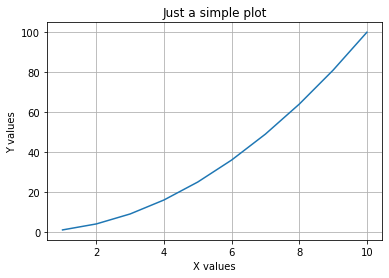

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Just a simple plot')
plt.grid()
x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
y = [ value**2 for value in x ]
plt.plot(x, y)
plt.show()

Ponieważ ręczne wpisywanie punktów (patrz definicja listy `x` powyżej) jest niewygodne, możemy łatwo je wygenerować. Do tworzenia zbioru punktów w zadanym przedziale, rozłożonych z zadanych krokiem, najczęściej wykorzystuje się metodę `arange` z pakietu `numpy`. Jej działanie obrazuje prosty skrypt:

In [11]:
import numpy as np
print(np.arange(-2, 2, 1))  # Punkty na przedziale [-2, 2) z krokiem 1.
print(np.arange(0, 1, 0.1)) # Punkty na przedziale [0, 1) z krokiem 0,1.

[-2 -1  0  1]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Poniżej przedstawiono wykorzystanie tej metody do wygenerowania zbioru argumentów funkcji sinus:

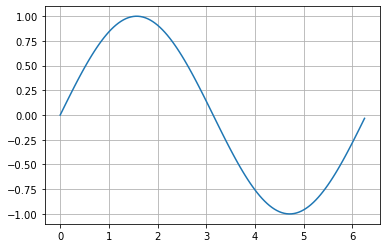

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
plt.grid()
plt.plot(x, y)
plt.show()

Więcej informacji na temat funkcji `arange` można zdobyć po wpisaniu w interpreterze Pythona `help(np.arange)` (oczywiście wcześniej pakiet `numpy` musi być zaimportowany i dostępny pod aliasem `np`).

### Wykres _X-Y_ (wykres rozproszenia)

Poniżej przedstawiono dwa przykłady bardziej złożonych skryptów do tworzenia wykresów gdzie dane pobrano:

1. z pliku .csv,
2. z pliku .txt.

In [13]:
from matplotlib import pyplot as plt

# Bardzo często zdarza się, że dane do wizualizacji należy pobrać z pliku np. w formacie csv
# Wygodnie jest w tym celu skorzystać z pakietu pandas

import pandas as pd

# Wczytujemy dane z pliku csv metodą "read_csv", gdzie wartością argumentu "sep" 
# definiujemy znak separatora - tu przecinek.
data = pd.read_csv('./python_part_2_pics/wykres_x_y.csv', sep = ',')
# Teraz wyświetlamy dane
print(data)

     x  y_1   y_2
0    0    0  0.10
1    1    1  0.95
2    2    2  2.15
3    3    3  2.98
4    4    4  4.07
5    5    5  4.95
6    6    6  6.20
7    7    7  6.90
8    8    8  7.80
9    9    9  9.40
10  10   10  9.90


Jak widać, w pierwszym wierszu mamy zdefiniowane nazwy kolumn: `x`, `y_1` i `y_2`. Każdy kolejny wiersz zawiera jeden rekord danych o trzech elementach. Pierwsza kolumna to automatycznie wygenerowana numeracja rekordów.

Teraz do poszczególnych kolumn można się odwoływać w następujący sposób:

* `data.x.values` – zawiera zbiór wszystkich wartości z kolumny nr 1,
* `data.y_1.values` – zawiera zbiór wszystkich wartości z kolumny nr 2,
* `data.y_2.values` – zawiera zbiór wszystkich wartości z kolumny nr 3.

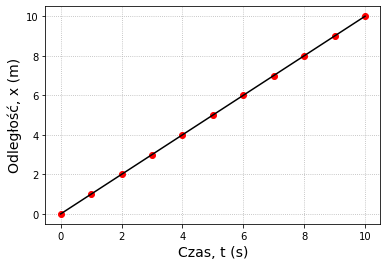

In [14]:
# Najprostszy wykres X-Y. Ostatni argument określa styl: 
# kolor (r - red) i kształt znacznika (o - kółko).
plt.plot(data.x.values, data.y_1.values,'ro')
# Analogicznie, ale używamy czarnej (k) linii ciągłej bez znaczników (-). 
# Inne style to m.in. ':' (linia kropkowa) i '--' (linia przerywana).
plt.plot(data.x.values, data.y_1.values, 'k-')
# Opisy osi. Można używać polskich znaków.
plt.xlabel('Czas, t (s)', fontsize=14)
plt.ylabel('Odległość, x (m)', fontsize=14)
# Siatka (cienka linia kropkowa)
plt.grid(linestyle=':')
# Zapisujemy wykres do pliku. Zalecane formaty to 'png' i 'pdf', NIGDY 'jpg'.
plt.savefig('./python_part_2_pics/wykres_x_y.pdf', format='pdf')
# Wyświetlamy wykres na ekranie
plt.show()

### Wykres słupkowy

In [15]:
# W przypadku pliku tekstowego, w którym nie występuje wiersz z nazwami kolumn, 
# sygnalizujemy to wartością header=None.
# Dodatkowo, wykorzystując argument names=['day','night'], możemy nadać własne tytuły kolumnom z danymi.

weather_data = pd.read_csv(
   "./python_part_2_pics/prognoza_pogody.txt", 
   names = ['day', 'night'],
   header = None, 
   sep = ' '
)
print(weather_data)

# Przypisujemy dane do zmiennych pomocniczych
daytime_temp = weather_data.day.values
temp_at_night = weather_data.night.values


   day  night
0  7.0      2
1  4.5      3
2  2.0     -2


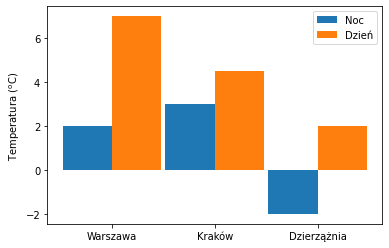

In [16]:
from matplotlib import pyplot as plt
import numpy as np

cities = ['Warszawa', 'Kraków', 'Dzierzążnia']       
# Do opisania osi X docelowo posłużą nazwy miast,
# ale do prawidłowego skonstruowania tej osi konieczny jest
# ciąg liczb - tutaj (0, 1, 2).
indexes = np.arange(len(cities))
# Względna szerokość słupka - przy dwóch seriach danych powinna wynosić 0,5 lub nieco mniej. 
bar_width = 0.48
# Wykres słupkowy pierwszej serii danych.
plt.bar(indexes, temp_at_night, bar_width, label='Noc')
# Druga seria danych jest przesunięta o szerokość słupka, żeby nie pokryła się z pierwszą.
plt.bar(indexes+bar_width, daytime_temp, bar_width, label='Dzień')
# Opisy osi X
plt.xticks(indexes+bar_width/2, cities)
# Tekst otoczony znakami $ może być sformatowany z użyciem składni 
# wyrażeń matematycznych edytora LaTeX. Pozwala to na używanie 
# greckich liter (np. $\alpha$), indeksów górnych ($E=mc^2$) i dolnych ($H_2O$), 
# znaków specjalnych itp. Jeśli nie chcemy używać czcionki pochylonej, 
# dodatkowo zamykamy tekst w \mathrm{ } 
plt.ylabel('Temperatura ($\mathrm{^o}$C)')
# Położenie legendy (tu: automatyczne).
plt.legend(loc='best') 
plt.savefig('./python_part_2_pics/prognoza_pogody.png', format='png')
plt.show()